# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [1237]:
df = pd.read_csv('inisiasi.csv')  
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department
0,0.38,0.53,2,157,3,0,1,0,sales
1,0.80,0.86,5,262,6,0,1,0,sales
2,0.11,0.88,7,272,4,0,1,0,sales
3,0.72,0.87,5,223,5,0,1,0,sales
4,0.37,0.52,2,159,3,0,1,0,sales


The dataset includes the following attributes:

Satisfaction Level: Employee satisfaction level.
Last Evaluation: Last performance evaluation score.
Number of Projects: Number of projects the employee has worked on.
Average Monthly Hours: Average monthly working hours.
Time Spent at Company: Number of years the employee has been with the company.
Work Accident: Whether the employee has had a work accident (1: Yes, 0: No).
Left: Whether the employee has left the company (1: Yes, 0: No).
Promotion in Last 5 Years: Whether the employee has been promoted in the last five years (1: Yes, 0: No).
Department: Department the employee belongs to.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [1238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


Dari hasil output df.info(), kita dapat melihat bahwa dataset ini terdiri 14999 baris dan 10 kolom. dengan 8 variabel bertipe data numerik dan 1 bertipe data kategori.

In [1239]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
dtype: int64

Tidak ada missing values, sehingga tidak perlu dilakukan imputasi atau pembersihan data lebih lanjut.

In [1240]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  3015


In [1241]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


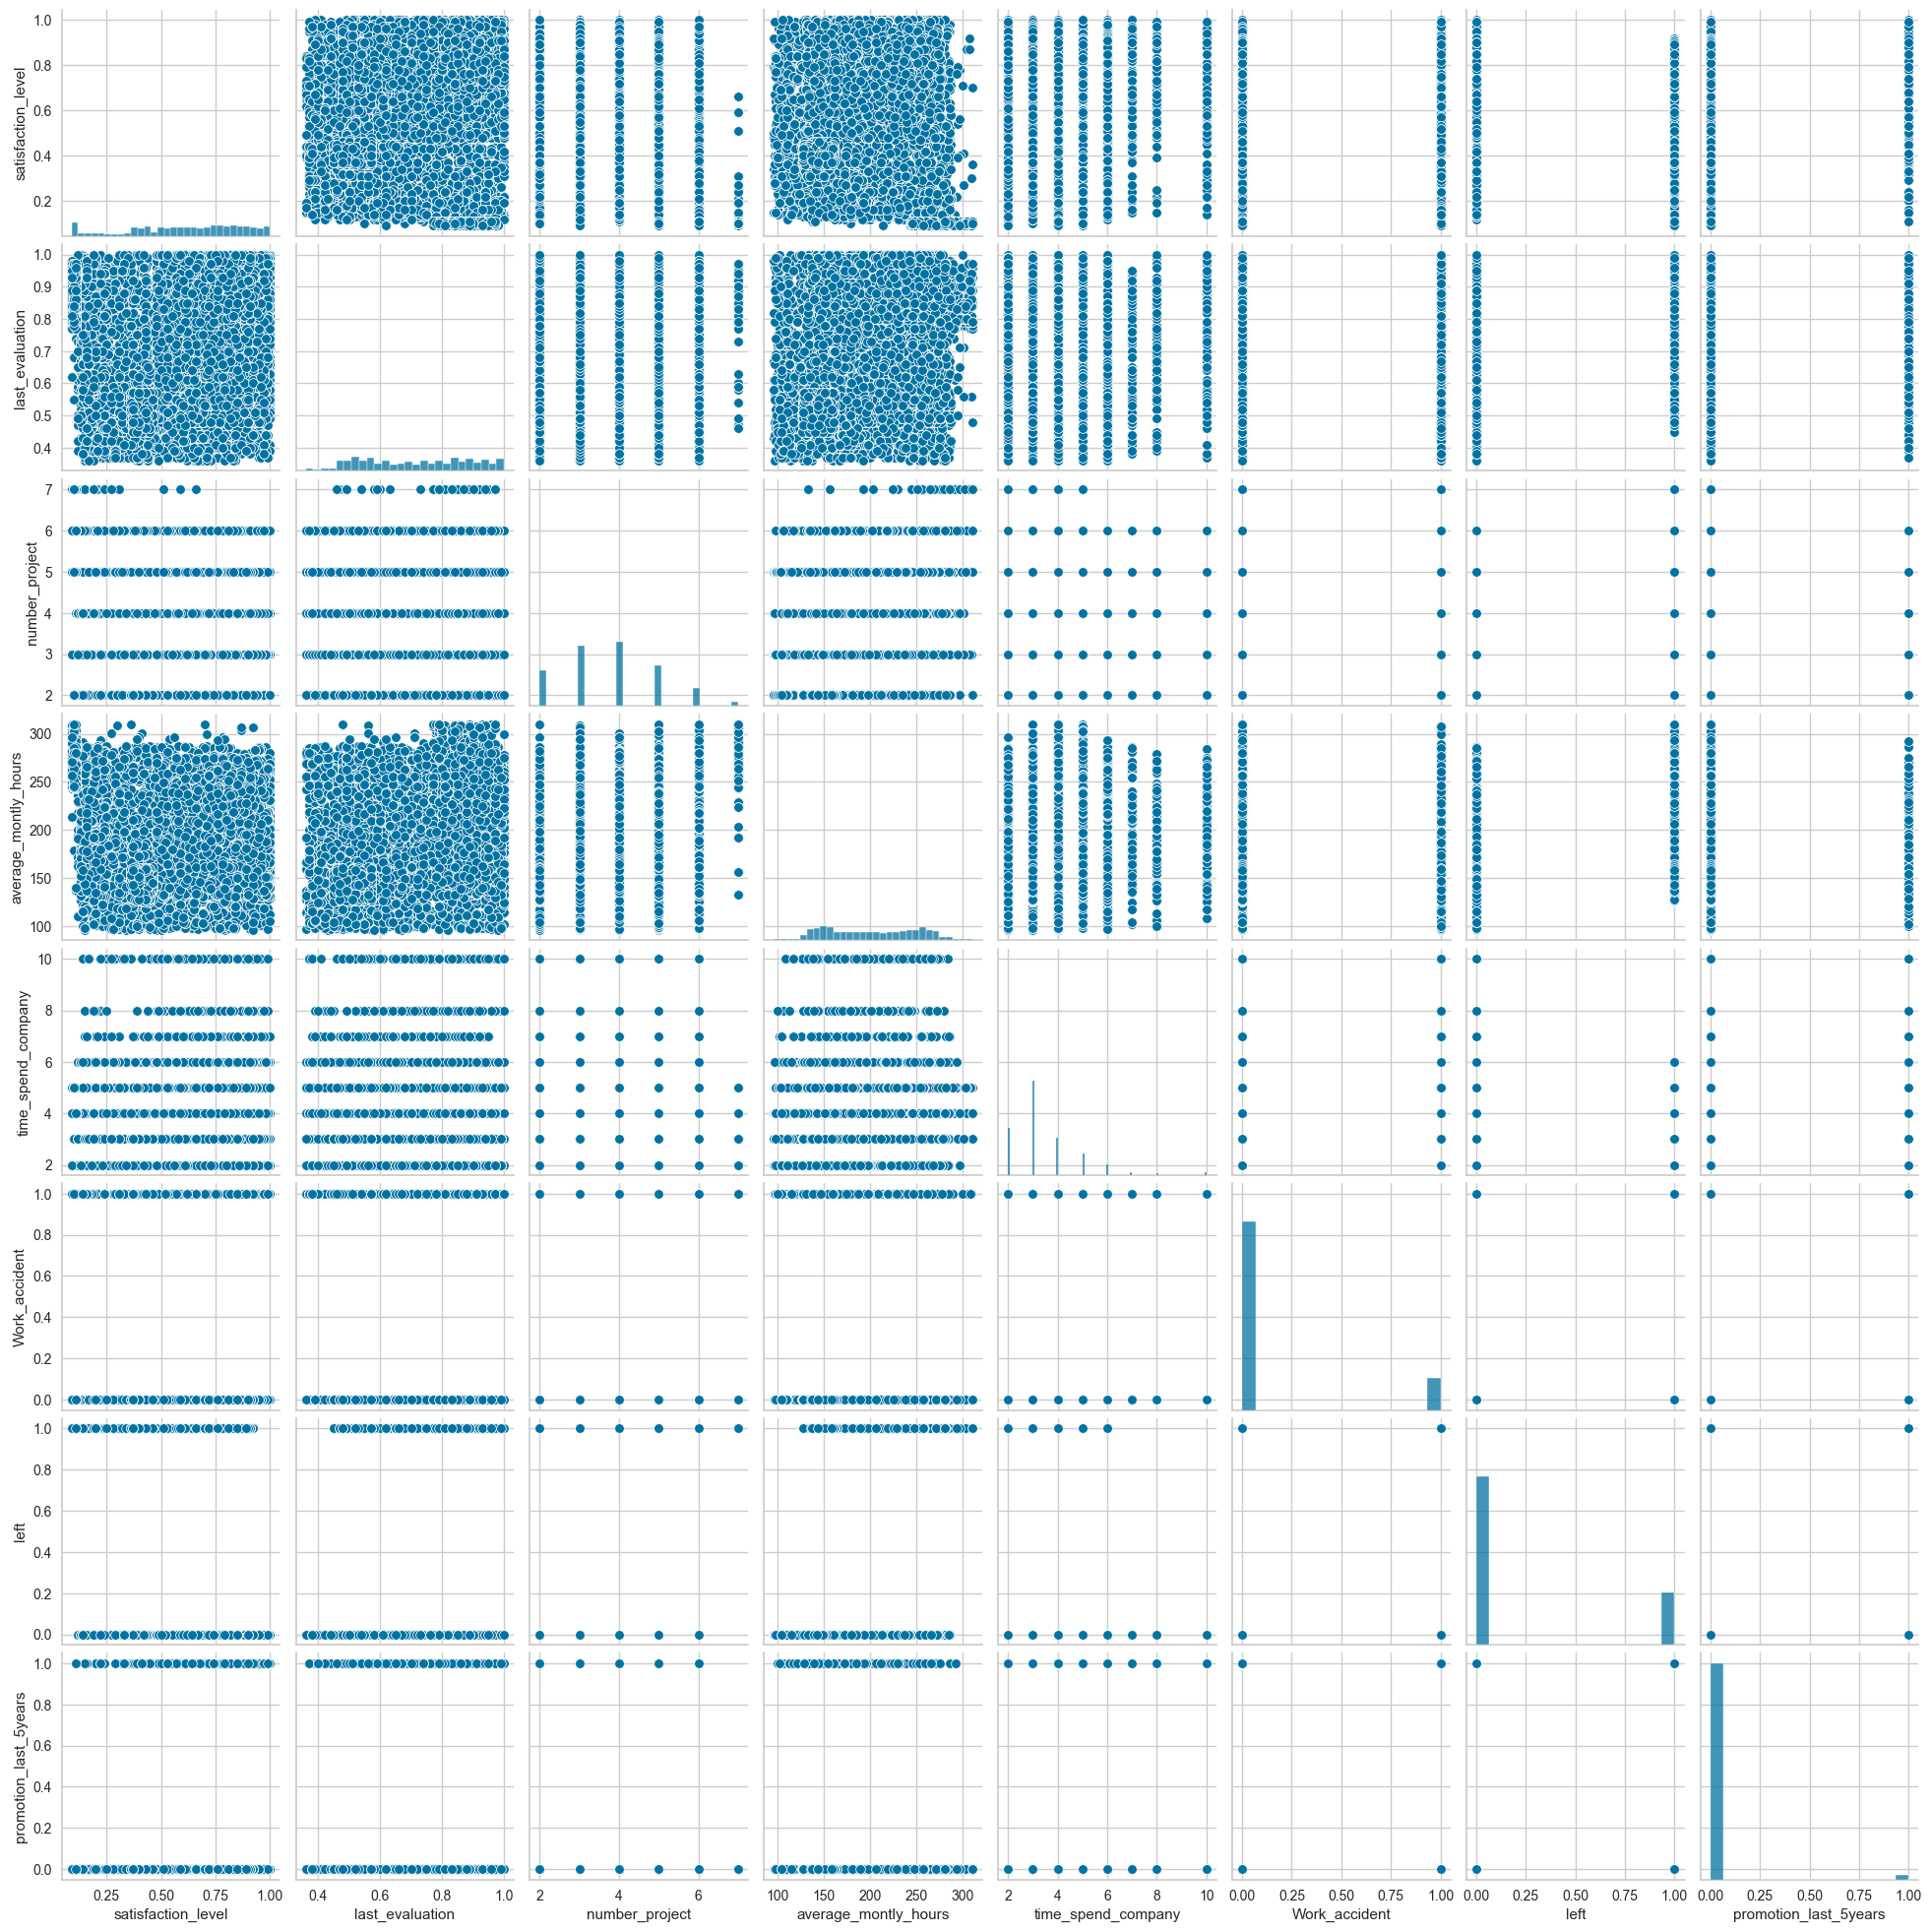

In [1242]:
sns.pairplot(df)

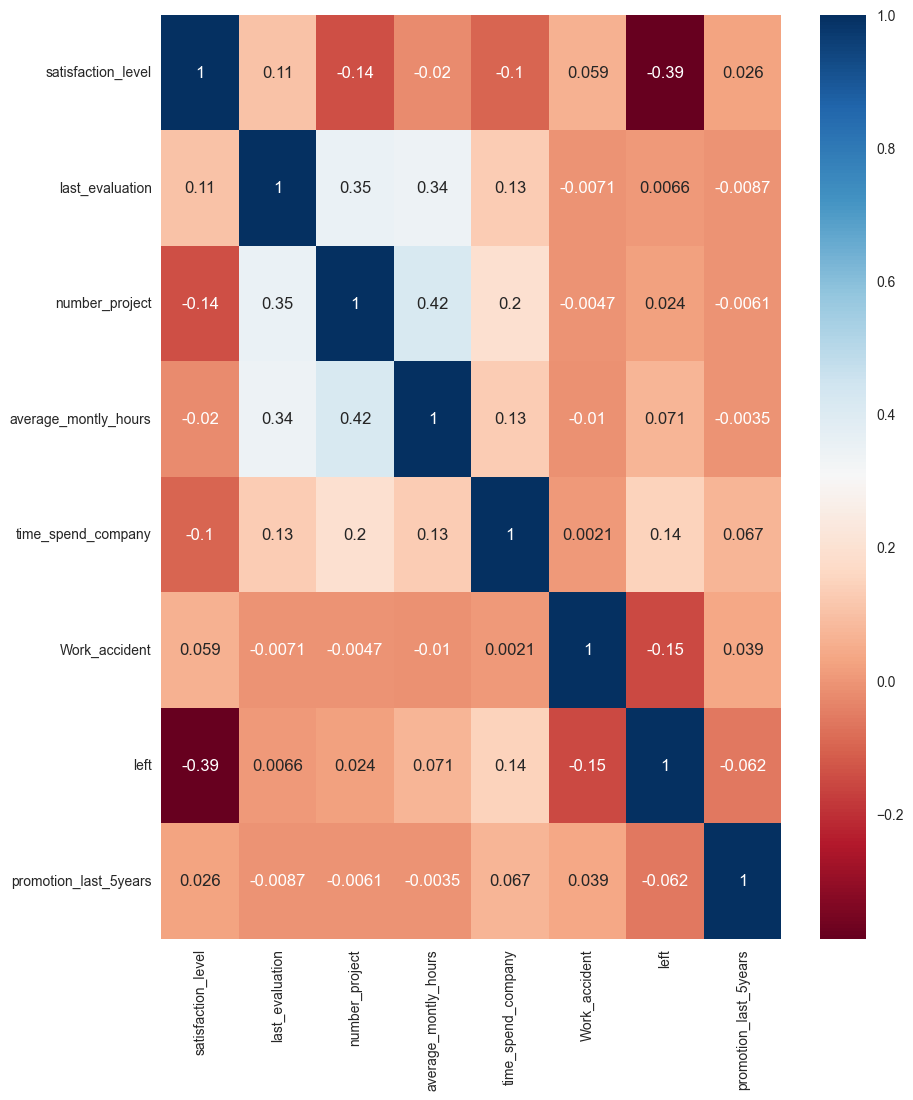

In [1243]:
plt.figure(figsize=(10,12))
numerical = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numerical.corr(), annot=True, cmap='RdBu')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. 

In [1244]:
df_new = df.drop_duplicates()
print(df_new.shape) 

(11984, 9)


Data duplikat telah ditangani

In [1245]:
def check_outlier(df):
    print('Outlier / jumlah data\n')
    for i in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        print(f'Outlier {i} : {round(df[(df[i] < lower) | (df[i] > upper)].shape[0] / df.shape[0] * 100,2)}%')

check_outlier(df_new)

Outlier / jumlah data

Outlier satisfaction_level : 0.0%
Outlier last_evaluation : 0.0%
Outlier number_project : 0.0%
Outlier average_montly_hours : 0.0%
Outlier time_spend_company : 6.88%
Outlier Work_accident : 15.44%
Outlier left : 16.56%
Outlier promotion_last_5years : 1.69%


In [1246]:
def cap_outliers(df, cols):
    df = df.copy()  
    for i in cols:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df.loc[df[i] < lower_bound, i] = lower_bound
        df.loc[df[i] > upper_bound, i] = upper_bound
    return df

df_new = cap_outliers(df_new, ['time_spend_company'])
check_outlier(df_new)

Outlier / jumlah data

Outlier satisfaction_level : 0.0%
Outlier last_evaluation : 0.0%
Outlier number_project : 0.0%
Outlier average_montly_hours : 0.0%
Outlier time_spend_company : 0.0%
Outlier Work_accident : 15.44%
Outlier left : 16.56%
Outlier promotion_last_5years : 1.69%


C:\Users\hp\AppData\Local\Temp\ipykernel_16692\1972004056.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] < lower_bound, i] = lower_bound


outlier pada Work_accident, left, promotion_last_5years tidak ditangani karena merupakan data biner

In [1247]:
categorical_feature = df_new.select_dtypes(include=['object','category'])
high_cardinal_column = []
low_cardinal_column = []
for col in categorical_feature.columns:
    print(f'unique value {col} : {categorical_feature[col].nunique()}')
    if categorical_feature[col].nunique() >= 10:
        high_cardinal_column.append(col)
    else:
        low_cardinal_column.append(col)

low_cardinal_feature = categorical_feature[low_cardinal_column]
high_cardinal_feature = categorical_feature[high_cardinal_column]

print(low_cardinal_feature.shape)
print(high_cardinal_feature.shape)

unique value Department : 10
(11984, 0)
(11984, 1)


In [1248]:
column = ['Department']
for col in column:
    freq = high_cardinal_feature[col].value_counts()
    high_cardinal_feature.loc[:, col] = high_cardinal_feature[col].map(freq)

In [1249]:
numerical_feature = df_new.select_dtypes(include=['int64', 'float64'])
df_encoded = pd.concat([numerical_feature,low_cardinal_feature,high_cardinal_feature], axis=1)
df_encoded

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department
0,0.38,0.53,2,157,3.0,0,1,0,3237
1,0.80,0.86,5,262,5.5,0,1,0,3237
2,0.11,0.88,7,272,4.0,0,1,0,3237
3,0.72,0.87,5,223,5.0,0,1,0,3237
4,0.37,0.52,2,159,3.0,0,1,0,3237
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,5.5,1,0,1,436
11996,0.74,0.95,5,266,5.5,0,0,1,436
11997,0.85,0.54,3,185,5.5,0,0,1,436
11998,0.33,0.65,3,172,5.5,0,0,1,673


In [1250]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
df_scaled

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department
0,0.318681,0.265625,0.0,0.285047,0.285714,0.0,1.0,0.0,1.000000
1,0.780220,0.781250,0.6,0.775701,1.000000,0.0,1.0,0.0,1.000000
2,0.021978,0.812500,1.0,0.822430,0.571429,0.0,1.0,0.0,1.000000
3,0.692308,0.796875,0.6,0.593458,0.857143,0.0,1.0,0.0,1.000000
4,0.307692,0.250000,0.0,0.294393,0.285714,0.0,1.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...
11979,0.890110,0.296875,0.2,0.761682,1.000000,1.0,0.0,1.0,0.000000
11980,0.714286,0.921875,0.6,0.794393,1.000000,0.0,0.0,1.0,0.000000
11981,0.835165,0.281250,0.2,0.415888,1.000000,0.0,0.0,1.0,0.000000
11982,0.263736,0.453125,0.2,0.355140,1.000000,0.0,0.0,1.0,0.084613


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

**Algoritma yang akan digunakan adalah K-Means**

In [1251]:
n = 4
kmeans = KMeans(n_clusters=n, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df_clustered = df_scaled.copy()
df_clustered['Cluster'] = clusters

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

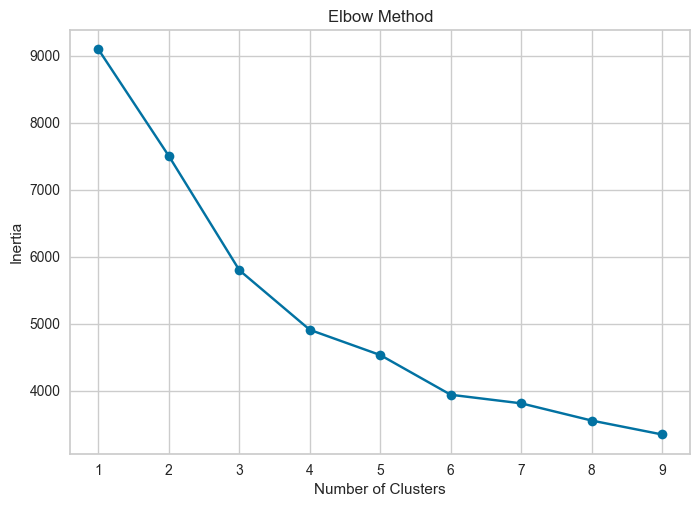

In [1252]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [1253]:
kmeans = KMeans(n_clusters=n, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
print("For n_clusters =", n,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 4 The average silhouette_score is : 0.24368174001670428


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

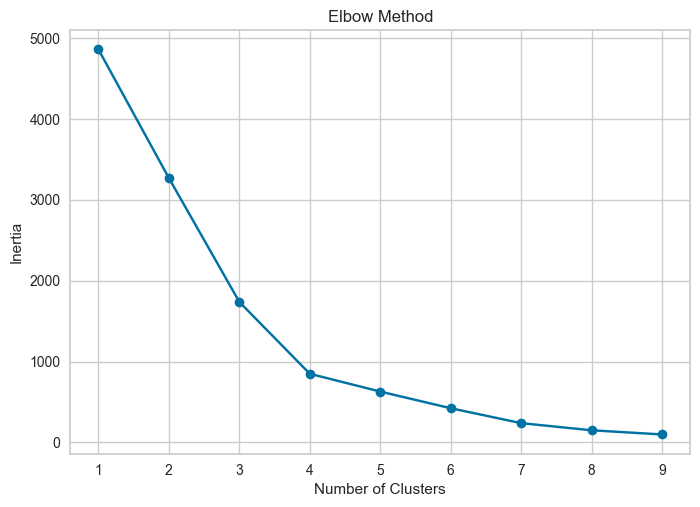

In [1254]:
selector = VarianceThreshold(threshold=0.10)
df_selected = selector.fit_transform(df_scaled)

inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[df_scaled.columns[selector.get_support()]])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [1255]:
column_selected = df_scaled.columns[selector.get_support()]
print(column_selected)

Index(['Work_accident', 'left', 'Department'], dtype='object')


In [1256]:
n = 5
kmeans = KMeans(n_clusters=n, random_state=42)
clusters = kmeans.fit_predict(df_scaled[column_selected])
df_clustered = df_scaled.copy()
df_clustered['Cluster'] = clusters

In [1257]:
silhouette_avg_selection = silhouette_score(df_scaled[column_selected], kmeans.labels_)
print("For n_clusters =", n,
      "The average silhouette_score is :", silhouette_avg_selection)

For n_clusters = 5 The average silhouette_score is : 0.7816320343909521


In [1258]:
print("Sebelum feature selection", silhouette_avg)
print("Setelah feature selection", silhouette_avg_selection)

Sebelum feature selection 0.24368174001670428
Setelah feature selection 0.7816320343909521


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

C:\Users\hp\AppData\Local\Temp\ipykernel_16692\4187007799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = clusters


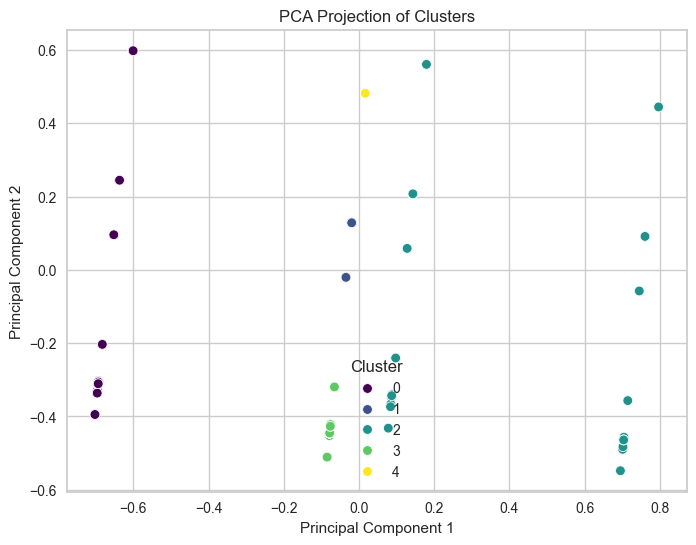

In [1259]:
df_selected = df_scaled[column_selected]
df_selected['Cluster'] = clusters

pca = PCA(n_components=2)

pca_result = pca.fit_transform(df_selected.drop('Cluster', axis=1))

df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_selected['Cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('PCA Projection of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [1260]:
df_original_clustered = df_new.copy()
df_original_clustered = df_original_clustered[column_selected]
df_original_clustered['Cluster'] = clusters
df_original_clustered

,Work_accident,left,Department,Cluster
0,0,1,sales,2
1,0,1,sales,2
2,0,1,sales,2
3,0,1,sales,2
4,0,1,sales,2
...,...,...,...,...
11995,1,0,management,0
11996,0,0,management,3
11997,0,0,management,3
11998,0,0,marketing,3


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [1234]:
df_summary = df_original_clustered.groupby('Cluster').agg({
    'Work_accident': ['mean', 'min', 'max'],
    'left': ['mean', 'min', 'max'],
    'Department': [('mode', lambda x: x.mode().iloc[0]),
                  ('count', lambda x: (x == x.mode().iloc[0]).sum())]
    
})


# Tambahkan distribusi jumlah sampel per cluster
cluster_distribution = df_original_clustered['Cluster'].value_counts().rename("count").sort_index()

# Gabungkan ke summary
df_summary['Cluster Size'] = cluster_distribution

df_summary

Work_accident         left         Department       Cluster Size
                 mean min max mean min max       mode count             
Cluster                                                                 
0            1.000000   1   1  0.0   0   0      sales   467         1745
1            0.000000   0   0  0.0   0   0  technical  1533         2761
2            0.052897   0   1  1.0   1   1      sales   548         1985
3            0.000000   0   0  0.0   0   0         IT   686         3271
4            0.000000   0   0  0.0   0   0      sales  2222         2222

# **Analisis Karakteristik Cluster dari Model KMeans**

## **Cluster 0:**
- **Rata-rata Work Accident**: **100%** karyawan mengalami kecelakaan kerja.
- **Rata-rata Tingkat Pengunduran Diri**: **0%** karyawan yang keluar.
- **Departemen Dominan**: **Sales**.
- **Jumlah Karyawan**: **1.745**.
- **Analisis**: Cluster ini terdiri dari karyawan di departemen **Sales** yang semuanya mengalami **kecelakaan kerja** tetapi tetap bertahan di perusahaan. Ini mungkin menunjukkan bahwa meskipun **lingkungan kerja berisiko**, faktor lain seperti **insentif atau budaya kerja** membuat mereka tetap bertahan.

## **Cluster 1:**
- **Rata-rata Work Accident**: **0%** karyawan mengalami kecelakaan kerja.
- **Rata-rata Tingkat Pengunduran Diri**: **0%** karyawan yang keluar.
- **Departemen Dominan**: **Technical**.
- **Jumlah Karyawan**: **2.761**.
- **Analisis**: Cluster ini berisi karyawan di departemen **Technical** yang **tidak mengalami kecelakaan kerja** dan semuanya tetap bertahan di perusahaan. Ini bisa menunjukkan bahwa **lingkungan kerja mereka lebih aman** atau memiliki **tingkat kepuasan kerja yang tinggi**.

## **Cluster 2:**
- **Rata-rata Work Accident**: **5.3%** karyawan mengalami kecelakaan kerja.
- **Rata-rata Tingkat Pengunduran Diri**: **100%** karyawan telah keluar.
- **Departemen Dominan**: **Sales**.
- **Jumlah Karyawan**: **1.985**.
- **Analisis**: Cluster ini terdiri dari karyawan di departemen **Sales** yang semuanya telah **mengundurkan diri**, dengan **sebagian kecil mengalami kecelakaan kerja**. Ini mungkin menunjukkan bahwa **tingkat stres atau ketidakpuasan dalam pekerjaan di Sales** menyebabkan banyak karyawan keluar.

## **Cluster 3:**
- **Rata-rata Work Accident**: **0%** karyawan mengalami kecelakaan kerja.
- **Rata-rata Tingkat Pengunduran Diri**: **0%** karyawan yang keluar.
- **Departemen Dominan**: **IT**.
- **Jumlah Karyawan**: **3.271**.
- **Analisis**: Cluster ini berisi karyawan dari departemen **IT** yang **stabil**, tanpa **kecelakaan kerja** dan tanpa **pengunduran diri**. Hal ini bisa mengindikasikan bahwa mereka memiliki **lingkungan kerja yang lebih aman** dan **tingkat kepuasan yang tinggi**.

## **Cluster 4:**
- **Rata-rata Work Accident**: **0%** karyawan mengalami kecelakaan kerja.
- **Rata-rata Tingkat Pengunduran Diri**: **0%** karyawan yang keluar.
- **Departemen Dominan**: **Sales**.
- **Jumlah Karyawan**: **2.222**.
- **Analisis**: Cluster ini terdiri dari karyawan di departemen **Sales** yang semuanya **tetap bekerja tanpa kecelakaan kerja**. Ini menunjukkan bahwa meskipun ada **cluster lain di Sales dengan tingkat kecelakaan kerja tinggi dan pengunduran diri**, ada juga kelompok yang **stabil**.


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [1235]:
df_clustered = df_scaled.copy()
df_clustered = df_clustered[column_selected]
df_clustered['Cluster'] = clusters
df_clustered.to_csv('dataset_clustering.csv', index=False)